In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/03_Mar.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,17.000000,75.000000,1,4,1,1844.0,1891.0,1964.0,1719.0,1540.0,1670.0,1856.416667,1713.0
1,16.916667,74.583333,1,4,1,1787.0,1879.0,1933.0,1679.0,1533.0,1680.0,1834.916667,1675.0
2,16.833333,74.166667,1,4,1,1789.0,1919.0,1950.0,1665.0,1520.0,1664.0,1812.083333,1676.0
3,16.750000,73.750000,1,4,1,1754.0,1885.0,1933.0,1645.0,1500.0,1636.0,1785.333333,1612.0
4,16.666667,73.333333,2,4,1,1713.0,1844.0,1891.0,1614.0,1482.0,1591.0,1763.000000,1623.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,20.532452,58.908200,23,1,0,2076.0,2081.0,2215.0,2300.0,2348.0,2270.0,2085.833333,2094.0
8924,20.532452,58.908200,24,1,0,2064.0,1914.0,2200.0,2274.0,2325.0,2273.0,2075.333333,2074.0
8925,20.532452,58.908200,24,1,0,2099.0,1985.0,2186.0,2248.0,2289.0,2244.0,2064.000000,2050.0
8926,20.200000,58.908200,24,1,0,2119.0,2039.0,2173.0,2205.0,2224.0,2192.0,2050.083333,2006.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 4992][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.938371,-1.032032,1.169603,-1.660699,-0.029455,0.606894,-0.445705,-0.268448,0.006405,-0.914839,-1.568511,-1.004322,-0.418586
1,-1.080876,-1.047602,1.143068,-1.660699,-0.029455,0.606894,-0.659779,-0.313547,-0.110176,-1.069250,-1.595809,-0.964664,-0.503302
2,-1.077126,-1.063172,1.116533,-1.660699,-0.029455,0.606894,-0.652268,-0.163218,-0.046245,-1.123294,-1.646506,-1.028118,-0.593272
3,-1.317136,-1.078742,1.089998,-1.660699,-0.029455,0.606894,-0.783717,-0.290998,-0.110176,-1.200499,-1.724501,-1.139162,-0.698675
4,-1.275884,-1.094311,1.063463,-1.516262,-0.029455,0.606894,-0.937701,-0.445085,-0.268124,-1.320168,-1.794696,-1.317626,-0.786675


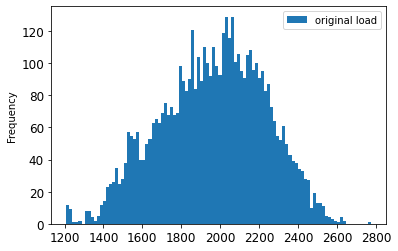

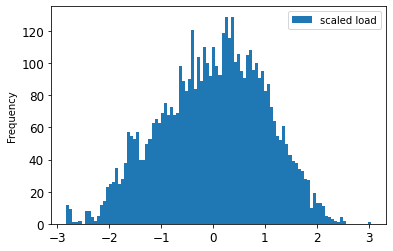

In [9]:
stlf_data[stlf_data.index <= 4992][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4992][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

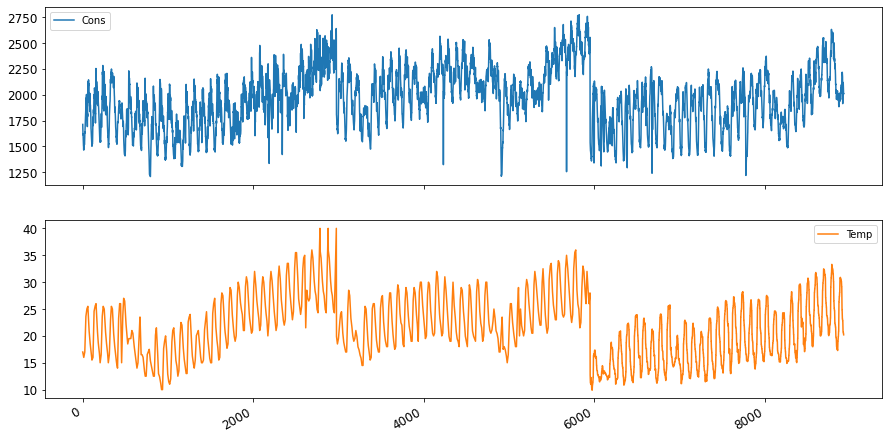

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-0.938371,-1.032032,1.169603,-1.660699,-0.029455,0.606894,-0.445705,-0.268448,0.006405,-0.914839,-1.568511,-1.004322,-0.418586,-1.080876
1,-1.080876,-1.047602,1.143068,-1.660699,-0.029455,0.606894,-0.659779,-0.313547,-0.110176,-1.069250,-1.595809,-0.964664,-0.503302,-1.077126
2,-1.077126,-1.063172,1.116533,-1.660699,-0.029455,0.606894,-0.652268,-0.163218,-0.046245,-1.123294,-1.646506,-1.028118,-0.593272,-1.317136
3,-1.317136,-1.078742,1.089998,-1.660699,-0.029455,0.606894,-0.783717,-0.290998,-0.110176,-1.200499,-1.724501,-1.139162,-0.698675,-1.275884
4,-1.275884,-1.094311,1.063463,-1.516262,-0.029455,0.606894,-0.937701,-0.445085,-0.268124,-1.320168,-1.794696,-1.317626,-0.786675,-1.392138
5,-1.392138,-1.109881,1.036928,-1.516262,-0.029455,0.606894,-1.080417,-0.659305,-0.313253,-1.435976,-1.888290,-1.452466,-0.880914,-1.504643
6,-1.504643,-1.125451,1.010393,-1.516262,-0.029455,0.606894,-1.076661,-0.651789,-0.162826,-1.505461,-1.997483,-1.603169,-0.998138,-1.613397
7,-1.613397,-1.141021,0.983858,-1.516262,-0.029455,0.606894,-1.317026,-0.783327,-0.290689,-1.582666,-2.032581,-1.571442,-1.113720,-1.718401
8,-1.718401,-1.156590,0.957323,-1.371824,-0.029455,0.606894,-1.275713,-0.937415,-0.444876,-1.563365,-2.083278,-1.575408,-1.225033,-1.722151
9,-1.722151,-1.172160,0.930788,-1.371824,-0.029455,0.606894,-1.392140,-1.080228,-0.659235,-1.625129,-2.114476,-1.559544,-1.317958,-1.733402


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-0.938371,-1.032032,1.169603,-1.660699,-0.029455,0.606894,-0.445705,-0.268448,0.006405,-0.914839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.938371
1,-1.080876,-1.047602,1.143068,-1.660699,-0.029455,0.606894,-0.659779,-0.313547,-0.110176,-1.069250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.938371,-1.080876
2,-1.077126,-1.063172,1.116533,-1.660699,-0.029455,0.606894,-0.652268,-0.163218,-0.046245,-1.123294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.938371,-1.080876,-1.077126
3,-1.317136,-1.078742,1.089998,-1.660699,-0.029455,0.606894,-0.783717,-0.290998,-0.110176,-1.200499,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.938371,-1.080876,-1.077126,-1.317136
4,-1.275884,-1.094311,1.063463,-1.516262,-0.029455,0.606894,-0.937701,-0.445085,-0.268124,-1.320168,...,NaN,NaN,NaN,NaN,NaN,-0.938371,-1.080876,-1.077126,-1.317136,-1.275884
5,-1.392138,-1.109881,1.036928,-1.516262,-0.029455,0.606894,-1.080417,-0.659305,-0.313253,-1.435976,...,NaN,NaN,NaN,NaN,-0.938371,-1.080876,-1.077126,-1.317136,-1.275884,-1.392138
6,-1.504643,-1.125451,1.010393,-1.516262,-0.029455,0.606894,-1.076661,-0.651789,-0.162826,-1.505461,...,NaN,NaN,NaN,-0.938371,-1.080876,-1.077126,-1.317136,-1.275884,-1.392138,-1.504643
7,-1.613397,-1.141021,0.983858,-1.516262,-0.029455,0.606894,-1.317026,-0.783327,-0.290689,-1.582666,...,NaN,NaN,-0.938371,-1.080876,-1.077126,-1.317136,-1.275884,-1.392138,-1.504643,-1.613397
8,-1.718401,-1.156590,0.957323,-1.371824,-0.029455,0.606894,-1.275713,-0.937415,-0.444876,-1.563365,...,NaN,-0.938371,-1.080876,-1.077126,-1.317136,-1.275884,-1.392138,-1.504643,-1.613397,-1.718401
9,-1.722151,-1.172160,0.930788,-1.371824,-0.029455,0.606894,-1.392140,-1.080228,-0.659235,-1.625129,...,-0.938371,-1.080876,-1.077126,-1.317136,-1.275884,-1.392138,-1.504643,-1.613397,-1.718401,-1.722151


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-1.733402,-1.18773,0.904252,-1.371824,-0.029455,0.606894,-1.504811,-1.076469,-0.651713,-1.617408,...,-1.080876,-1.077126,-1.317136,-1.275884,-1.392138,-1.504643,-1.613397,-1.718401,-1.722151,-1.733402
11,-1.857157,-1.20330,0.877717,-1.371824,-0.029455,0.606894,-1.613726,-1.316997,-0.783337,-1.648291,...,-1.077126,-1.317136,-1.275884,-1.392138,-1.504643,-1.613397,-1.718401,-1.722151,-1.733402,-1.857157
12,-1.733402,-1.21887,0.851182,-1.227387,-0.029455,0.606894,-1.718885,-1.275656,-0.937524,-1.806562,...,-1.317136,-1.275884,-1.392138,-1.504643,-1.613397,-1.718401,-1.722151,-1.733402,-1.857157,-1.733402
13,-1.860907,-1.20330,0.829954,-1.227387,-0.029455,0.606894,-1.722641,-1.392161,-1.080430,-1.748658,...,-1.275884,-1.392138,-1.504643,-1.613397,-1.718401,-1.722151,-1.733402,-1.857157,-1.733402,-1.860907
14,-1.710901,-1.18773,0.808726,-1.227387,-0.029455,0.606894,-1.733908,-1.504909,-1.076669,-1.725496,...,-1.392138,-1.504643,-1.613397,-1.718401,-1.722151,-1.733402,-1.857157,-1.733402,-1.860907,-1.710901


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 10 to 4991
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  4982 non-null   float64
 1   Temp           4982 non-null   float64
 2   Hum            4982 non-null   float64
 3   A              4982 non-null   float64
 4   B              4982 non-null   float64
 5   C              4982 non-null   float64
 6   D              4982 non-null   float64
 7   E              4982 non-null   float64
 8   F              4982 non-null   float64
 9   G              4982 non-null   float64
 10  H              4982 non-null   float64
 11  I              4982 non-null   float64
 12  J              4982 non-null   float64
 13  y_t+1          4982 non-null   float64
 14  Cons_t-10      4982 non-null   float64
 15  Cons_t-9       4982 non-null   float64
 16  Cons_t-8       4982 non-null   float64
 17  Cons_t-7       4982 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
10,-1.857157
11,-1.733402
12,-1.860907
13,-1.710901
14,-1.695900
...,...
4987,-0.270845
4988,-0.413350
4989,-0.218343
4990,-0.240843


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-1.733402,-1.733402,-1.722151,-1.718401,-1.613397,-1.504643,-1.392138,-1.275884,-1.317136,-1.077126,...,-1.371824,-0.029455,0.606894,-1.504811,-1.076469,-0.651713,-1.617408,-2.052080,-1.579374,-1.412525
11,-1.857157,-1.857157,-1.733402,-1.722151,-1.718401,-1.613397,-1.504643,-1.392138,-1.275884,-1.317136,...,-1.371824,-0.029455,0.606894,-1.613726,-1.316997,-0.783337,-1.648291,-2.067679,-1.626964,-1.506436
12,-1.733402,-1.733402,-1.857157,-1.733402,-1.722151,-1.718401,-1.613397,-1.504643,-1.392138,-1.275884,...,-1.227387,-0.029455,0.606894,-1.718885,-1.275656,-0.937524,-1.806562,-2.176872,-1.745940,-1.576048
13,-1.860907,-1.860907,-1.733402,-1.857157,-1.733402,-1.722151,-1.718401,-1.613397,-1.504643,-1.392138,...,-1.227387,-0.029455,0.606894,-1.722641,-1.392161,-1.080430,-1.748658,-2.250967,-1.650759,-1.644346
14,-1.710901,-1.710901,-1.860907,-1.733402,-1.857157,-1.733402,-1.722151,-1.718401,-1.613397,-1.504643,...,-1.227387,-0.029455,0.606894,-1.733908,-1.504909,-1.076669,-1.725496,-2.215870,-1.630930,-1.699838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,-0.248344,-0.248344,-0.315846,-0.499604,-0.600858,-0.552106,-0.525855,-0.398350,-0.248344,-0.150840,...,1.516927,-0.029455,0.606894,-0.550864,-0.148185,0.047772,0.355190,1.266610,0.467016,-0.326974
4988,-0.270845,-0.270845,-0.248344,-0.315846,-0.499604,-0.600858,-0.552106,-0.525855,-0.398350,-0.248344,...,1.661365,-0.029455,0.606894,-0.599688,-0.245899,0.059054,0.289565,1.137918,0.363903,-0.355541
4989,-0.413350,-0.413350,-0.270845,-0.248344,-0.315846,-0.499604,-0.600858,-0.552106,-0.525855,-0.398350,...,1.661365,-0.029455,0.606894,-0.498285,-0.396228,-0.113937,0.096552,1.141818,0.514606,-0.381481
4990,-0.218343,-0.218343,-0.413350,-0.270845,-0.248344,-0.315846,-0.499604,-0.600858,-0.552106,-0.525855,...,1.661365,-0.029455,0.606894,-0.314256,-0.524008,-0.155304,0.254823,1.531793,0.835842,-0.386735


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4982, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(4982,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=4993) & (stlf_data.index <5953)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,1850.0,17.000000,73.000000,1.0,5.0,1.0,1853.0,1830.0,1857.0,1892.0,2238.0,2070.0,1860.500000
4994,1826.0,17.500000,71.000000,1.0,5.0,1.0,1905.0,1879.0,1823.0,1861.0,2235.0,2037.0,1860.750000
4995,1818.0,18.000000,69.000000,1.0,5.0,1.0,1899.0,1897.0,1816.0,1833.0,2212.0,2051.0,1860.916667
4996,1797.0,18.500000,67.000000,2.0,5.0,1.0,1880.0,1891.0,1803.0,1813.0,2195.0,2037.0,1860.416667
4997,1779.0,19.000000,65.000000,2.0,5.0,1.0,1850.0,1853.0,1830.0,1728.0,2191.0,1986.0,1856.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,2479.0,27.454545,61.181818,24.0,7.0,0.0,2402.0,2468.0,2494.0,2421.0,2488.0,2422.0,2452.250000
5949,2436.0,27.636364,61.454545,24.0,7.0,0.0,2431.0,2432.0,2505.0,2381.0,2418.0,2456.0,2446.500000
5950,2526.0,27.818182,61.727273,24.0,7.0,0.0,2454.0,2394.0,2476.0,2511.0,2504.0,2534.0,2450.666667
5951,2555.0,28.000000,62.000000,24.0,7.0,0.0,2494.0,2412.0,2480.0,2491.0,2505.0,2498.0,2456.916667


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,-1.485845,-2.151438,1.680412,-1.661325,0.203543,0.816497,-1.463884,-1.542984,-1.423306,-0.955239,0.447872,-0.133703,-1.477853
4994,-1.579745,-2.037347,1.545623,-1.661325,0.203543,0.816497,-1.260519,-1.351611,-1.555656,-1.065519,0.436134,-0.271595,-1.476843
4995,-1.611045,-1.923256,1.410834,-1.661325,0.203543,0.816497,-1.283984,-1.281311,-1.582905,-1.165127,0.346144,-0.213095,-1.476170
4996,-1.693208,-1.809165,1.276045,-1.516862,0.203543,0.816497,-1.358291,-1.304744,-1.633509,-1.236275,0.279630,-0.271595,-1.478189
4997,-1.763633,-1.695074,1.141256,-1.516862,0.203543,0.816497,-1.475617,-1.453156,-1.528407,-1.538655,0.263980,-0.484701,-1.495351
4998,-1.845796,-1.580983,1.006467,-1.516862,0.203543,0.816497,-1.569478,-1.250066,-1.337667,-1.737871,0.095738,-0.509772,-1.536067
4999,-1.873183,-1.466893,0.871678,-1.516862,0.203543,0.816497,-1.600765,-1.273500,-1.267599,-1.695182,0.072263,-0.601700,-1.585197
5000,-1.873183,-1.352802,0.736889,-1.372399,0.203543,0.816497,-1.682893,-1.347705,-1.290955,-1.777002,0.005749,-0.676914,-1.632307
5001,-1.963171,-1.238711,0.602100,-1.372399,0.203543,0.816497,-1.753289,-1.464872,-1.438876,-1.979775,-0.017727,-0.710342,-1.674370
5002,-2.049246,-1.124620,0.467311,-1.372399,0.203543,0.816497,-1.835417,-1.558606,-1.236458,-2.278598,-0.021639,-0.660200,-1.741333


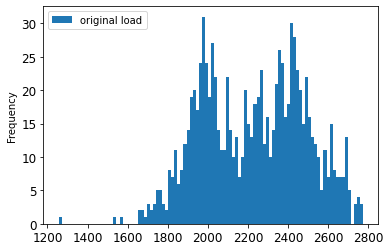

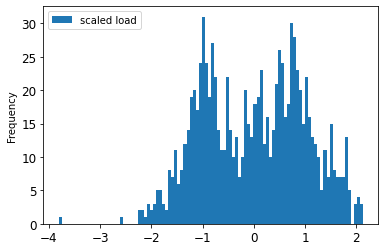

In [21]:
stlf_data[(stlf_data.index >=4993) & (stlf_data.index <=5953)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4993) & (valid.index <=5953)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4993,-1.485845,-2.151438,1.680412,-1.661325,0.203543,0.816497,-1.463884,-1.542984,-1.423306,-0.955239,0.447872,-0.133703,-1.477853,-1.579745
4994,-1.579745,-2.037347,1.545623,-1.661325,0.203543,0.816497,-1.260519,-1.351611,-1.555656,-1.065519,0.436134,-0.271595,-1.476843,-1.611045
4995,-1.611045,-1.923256,1.410834,-1.661325,0.203543,0.816497,-1.283984,-1.281311,-1.582905,-1.165127,0.346144,-0.213095,-1.476170,-1.693208
4996,-1.693208,-1.809165,1.276045,-1.516862,0.203543,0.816497,-1.358291,-1.304744,-1.633509,-1.236275,0.279630,-0.271595,-1.478189,-1.763633
4997,-1.763633,-1.695074,1.141256,-1.516862,0.203543,0.816497,-1.475617,-1.453156,-1.528407,-1.538655,0.263980,-0.484701,-1.495351,-1.845796
4998,-1.845796,-1.580983,1.006467,-1.516862,0.203543,0.816497,-1.569478,-1.250066,-1.337667,-1.737871,0.095738,-0.509772,-1.536067,-1.873183
4999,-1.873183,-1.466893,0.871678,-1.516862,0.203543,0.816497,-1.600765,-1.273500,-1.267599,-1.695182,0.072263,-0.601700,-1.585197,-1.873183
5000,-1.873183,-1.352802,0.736889,-1.372399,0.203543,0.816497,-1.682893,-1.347705,-1.290955,-1.777002,0.005749,-0.676914,-1.632307,-1.963171
5001,-1.963171,-1.238711,0.602100,-1.372399,0.203543,0.816497,-1.753289,-1.464872,-1.438876,-1.979775,-0.017727,-0.710342,-1.674370,-2.049246
5002,-2.049246,-1.124620,0.467311,-1.372399,0.203543,0.816497,-1.835417,-1.558606,-1.236458,-2.278598,-0.021639,-0.660200,-1.741333,-2.029684


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4993,-1.485845,-2.151438,1.680412,-1.661325,0.203543,0.816497,-1.463884,-1.542984,-1.423306,-0.955239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.485845
4994,-1.579745,-2.037347,1.545623,-1.661325,0.203543,0.816497,-1.260519,-1.351611,-1.555656,-1.065519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.485845,-1.579745
4995,-1.611045,-1.923256,1.410834,-1.661325,0.203543,0.816497,-1.283984,-1.281311,-1.582905,-1.165127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.485845,-1.579745,-1.611045
4996,-1.693208,-1.809165,1.276045,-1.516862,0.203543,0.816497,-1.358291,-1.304744,-1.633509,-1.236275,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.485845,-1.579745,-1.611045,-1.693208
4997,-1.763633,-1.695074,1.141256,-1.516862,0.203543,0.816497,-1.475617,-1.453156,-1.528407,-1.538655,...,NaN,NaN,NaN,NaN,NaN,-1.485845,-1.579745,-1.611045,-1.693208,-1.763633
4998,-1.845796,-1.580983,1.006467,-1.516862,0.203543,0.816497,-1.569478,-1.250066,-1.337667,-1.737871,...,NaN,NaN,NaN,NaN,-1.485845,-1.579745,-1.611045,-1.693208,-1.763633,-1.845796
4999,-1.873183,-1.466893,0.871678,-1.516862,0.203543,0.816497,-1.600765,-1.273500,-1.267599,-1.695182,...,NaN,NaN,NaN,-1.485845,-1.579745,-1.611045,-1.693208,-1.763633,-1.845796,-1.873183
5000,-1.873183,-1.352802,0.736889,-1.372399,0.203543,0.816497,-1.682893,-1.347705,-1.290955,-1.777002,...,NaN,NaN,-1.485845,-1.579745,-1.611045,-1.693208,-1.763633,-1.845796,-1.873183,-1.873183
5001,-1.963171,-1.238711,0.602100,-1.372399,0.203543,0.816497,-1.753289,-1.464872,-1.438876,-1.979775,...,NaN,-1.485845,-1.579745,-1.611045,-1.693208,-1.763633,-1.845796,-1.873183,-1.873183,-1.963171
5002,-2.049246,-1.124620,0.467311,-1.372399,0.203543,0.816497,-1.835417,-1.558606,-1.236458,-2.278598,...,-1.485845,-1.579745,-1.611045,-1.693208,-1.763633,-1.845796,-1.873183,-1.873183,-1.963171,-2.049246


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5003,-2.029684,-1.010529,0.332522,-1.372399,0.203543,0.816497,-1.862793,-1.589851,-1.259814,-2.474256,...,-1.579745,-1.611045,-1.693208,-1.763633,-1.845796,-1.873183,-1.873183,-1.963171,-2.049246,-2.029684
5004,-2.006209,-0.896438,0.197733,-1.227936,0.203543,0.816497,-1.862793,-1.671867,-1.333774,-2.580979,...,-1.611045,-1.693208,-1.763633,-1.845796,-1.873183,-1.873183,-1.963171,-2.049246,-2.029684,-2.006209
5005,-2.115759,-0.829885,0.164036,-1.227936,0.203543,0.816497,-1.952743,-1.742168,-1.450554,-2.940278,...,-1.693208,-1.763633,-1.845796,-1.873183,-1.873183,-1.963171,-2.049246,-2.029684,-2.006209,-2.115759
5006,-2.213572,-0.763332,0.130338,-1.227936,0.203543,0.816497,-2.038782,-1.824185,-1.543978,-3.281790,...,-1.763633,-1.845796,-1.873183,-1.873183,-1.963171,-2.049246,-2.029684,-2.006209,-2.115759,-2.213572
5007,-2.213572,-0.696779,0.096641,-1.227936,0.203543,0.816497,-2.019228,-1.851524,-1.575119,-3.374283,...,-1.845796,-1.873183,-1.873183,-1.963171,-2.049246,-2.029684,-2.006209,-2.115759,-2.213572,-2.213572


In [25]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
5003,-2.006209
5004,-2.115759
5005,-2.213572
5006,-2.213572
5007,-2.194009
...,...
5947,0.975124
5948,0.806886
5949,1.159012
5950,1.272474


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5003,-2.029684,-2.029684,-2.049246,-1.963171,-1.873183,-1.873183,-1.845796,-1.763633,-1.693208,-1.611045,...,-1.372399,0.203543,0.816497,-1.862793,-1.589851,-1.259814,-2.474256,-0.056853,-0.701985,-1.804596
5004,-2.006209,-2.006209,-2.029684,-2.049246,-1.963171,-1.873183,-1.873183,-1.845796,-1.763633,-1.693208,...,-1.227936,0.203543,0.816497,-1.862793,-1.671867,-1.333774,-2.580979,-0.154668,-0.793913,-1.859446
5005,-2.115759,-2.115759,-2.006209,-2.029684,-2.049246,-1.963171,-1.873183,-1.873183,-1.845796,-1.763633,...,-1.227936,0.203543,0.816497,-1.952743,-1.742168,-1.450554,-2.940278,-0.205531,-0.873306,-1.913622
5006,-2.213572,-2.213572,-2.115759,-2.006209,-2.029684,-2.049246,-1.963171,-1.873183,-1.873183,-1.845796,...,-1.227936,0.203543,0.816497,-2.038782,-1.824185,-1.543978,-3.281790,-0.307259,-0.990305,-1.968136
5007,-2.213572,-2.213572,-2.213572,-2.115759,-2.006209,-2.029684,-2.049246,-1.963171,-1.873183,-1.873183,...,-1.227936,0.203543,0.816497,-2.019228,-1.851524,-1.575119,-3.374283,-0.385511,-1.048805,-2.019957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,1.033811,1.033811,0.877311,0.787323,0.673860,0.712986,0.642560,0.791236,0.932086,0.979036,...,1.516862,1.223915,-1.224745,0.722293,0.995635,1.180882,0.962209,1.555136,1.533538,0.916694
5948,0.975124,0.975124,1.033811,0.877311,0.787323,0.673860,0.712986,0.642560,0.791236,0.932086,...,1.661325,1.223915,-1.224745,0.683185,0.948768,1.056317,0.926635,1.426020,1.337146,0.911646
5949,0.806886,0.806886,0.975124,1.033811,0.877311,0.787323,0.673860,0.712986,0.642560,0.791236,...,1.661325,1.223915,-1.224745,0.796600,0.808168,1.099136,0.784338,1.152139,1.479217,0.888428
5950,1.159012,1.159012,0.806886,0.975124,1.033811,0.877311,0.787323,0.673860,0.712986,0.642560,...,1.661325,1.223915,-1.224745,0.886550,0.659756,0.986249,1.246803,1.488622,1.805144,0.905253


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(949, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(949,2,1,12)
print(X_valid.shape)

(949, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add((LSTM(128,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 128)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 149,889
Trainable params: 149,889
Non-trainable params: 0
__________________________________________________

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
17/17 [==============================] - 1s 47ms/step - loss: 0.2334 - val_loss: 0.0964
Epoch 2/300
17/17 [==============================] - 0s 22ms/step - loss: 0.0657 - val_loss: 0.0674
Epoch 3/300
17/17 [==============================] - 0s 21ms/step - loss: 0.0486 - val_loss: 0.0631
Epoch 4/300
17/17 [==============================] - 0s 19ms/step - loss: 0.0458 - val_loss: 0.0690
Epoch 5/300
17/17 [==============================] - 0s 20ms/step - loss: 0.0397 - val_loss: 0.0635
Epoch 6/300
17/17 [==============================] - 0s 19ms/step - loss: 0.0369 - val_loss: 0.0710
Epoch 7/300
17/17 [==============================] - 0s 20ms/step - loss: 0.0382 - val_loss: 0.0619
Epoch 8/300
17/17 [==============================] - 0s 20ms/step - loss: 0.0356 - val_loss: 0.0601
Epoch 9/300
17/17 [==============================] - 0s 21ms/step - loss: 0.0345 - val_loss: 0.0592
Epoch 10/300
17/17 [==============================] - 0s 20ms/step - loss: 0.0335 - val_loss: 0.0654

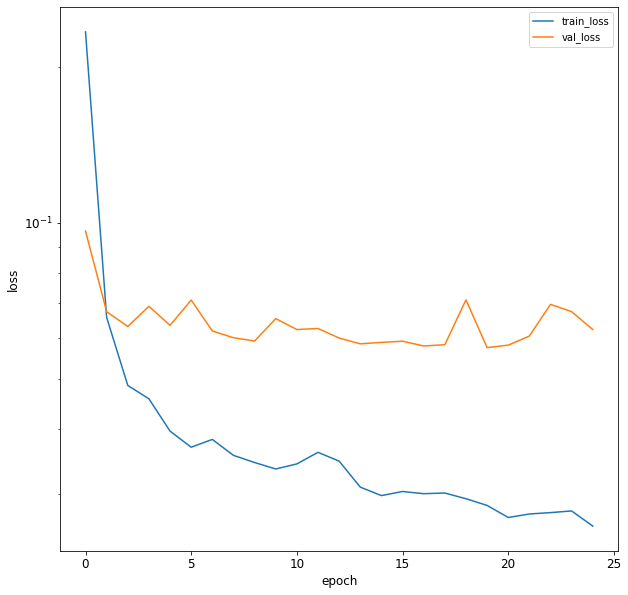

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[stlf_data.index >= 5954][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5954,1515.0,12.012452,82.014872,1.0,6.0,1.0,1621.0,1765.0,1863.0,1501.0,1494.0,1266.0,1670.083333
5955,1484.0,11.302452,84.133550,1.0,6.0,1.0,1588.0,1687.0,1837.0,1481.0,1470.0,1251.0,1640.666667
5956,1477.0,11.302452,84.133550,2.0,6.0,1.0,1572.0,1673.0,1808.0,1465.0,1444.0,1210.0,1613.083333
5957,1458.0,11.302452,84.133550,2.0,6.0,1.0,1539.0,1666.0,1770.0,1442.0,1452.0,1230.0,1587.083333
5958,1458.0,11.157452,84.488170,2.0,6.0,1.0,1515.0,1621.0,1765.0,1431.0,1442.0,1247.0,1561.500000
5959,1434.0,11.012452,84.842790,2.0,6.0,1.0,1484.0,1588.0,1687.0,1428.0,1424.0,1237.0,1540.416667
5960,1433.0,11.012452,84.842790,3.0,6.0,1.0,1477.0,1572.0,1673.0,1418.0,1421.0,1243.0,1520.416667
5961,1418.0,11.012452,84.842790,3.0,6.0,1.0,1458.0,1539.0,1666.0,1407.0,1397.0,1244.0,1499.750000
5962,1397.0,11.627452,81.771205,3.0,6.0,1.0,1458.0,1515.0,1621.0,1394.0,1387.0,1226.0,1481.083333
5963,1389.0,12.242452,78.699620,3.0,6.0,1.0,1434.0,1484.0,1588.0,1393.0,1382.0,1226.0,1464.500000


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2974 entries, 5954 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2974 non-null   float64
 1   Temp    2974 non-null   float64
 2   Hum     2974 non-null   float64
 3   A       2974 non-null   float64
 4   B       2974 non-null   float64
 5   C       2974 non-null   float64
 6   D       2974 non-null   float64
 7   E       2974 non-null   float64
 8   F       2974 non-null   float64
 9   G       2974 non-null   float64
 10  H       2974 non-null   float64
 11  I       2974 non-null   float64
 12  J       2974 non-null   float64
dtypes: float64(13)
memory usage: 325.3 KB


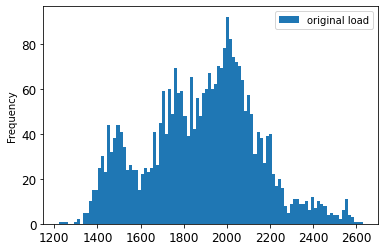

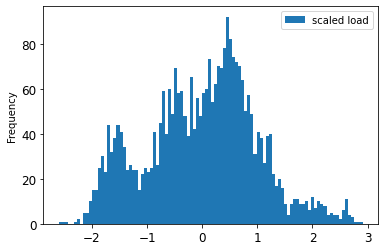

In [36]:
stlf_data[stlf_data.index >= 5954][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5954][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5954,-1.449973,-1.326800,0.787629,-1.663428,0.931966,0.690408,-1.032417,-0.467812,-0.083973,-1.461584,-1.486664,-2.413777,-0.880951,-1.571168
5955,-1.571168,-1.460949,0.899199,-1.663428,0.931966,0.690408,-1.161337,-0.772554,-0.185567,-1.539099,-1.584067,-2.476745,-1.001472,-1.598534
5956,-1.598534,-1.460949,0.899199,-1.518879,0.931966,0.690408,-1.223843,-0.827252,-0.298884,-1.601110,-1.689587,-2.648855,-1.114481,-1.672815
5957,-1.672815,-1.460949,0.899199,-1.518879,0.931966,0.690408,-1.352763,-0.854600,-0.447367,-1.690252,-1.657119,-2.564898,-1.221004,-1.672815
5958,-1.672815,-1.488346,0.917874,-1.518879,0.931966,0.690408,-1.446523,-1.030413,-0.466904,-1.732885,-1.697704,-2.493536,-1.325820,-1.766643
5959,-1.766643,-1.515742,0.936548,-1.518879,0.931966,0.690408,-1.567629,-1.159343,-0.771686,-1.744512,-1.770756,-2.535514,-1.412199,-1.770553
5960,-1.770553,-1.515742,0.936548,-1.374330,0.931966,0.690408,-1.594976,-1.221854,-0.826390,-1.783269,-1.782931,-2.510327,-1.494140,-1.829195
5961,-1.829195,-1.515742,0.936548,-1.374330,0.931966,0.690408,-1.669202,-1.350784,-0.853742,-1.825902,-1.880334,-2.506129,-1.578811,-1.911295
5962,-1.911295,-1.399543,0.774797,-1.374330,0.931966,0.690408,-1.669202,-1.444551,-1.029578,-1.876287,-1.920918,-2.581690,-1.655289,-1.942571
5963,-1.942571,-1.283343,0.613046,-1.374330,0.931966,0.690408,-1.762962,-1.565667,-1.158524,-1.880163,-1.941210,-2.581690,-1.723232,-1.950390


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5954,-1.449973,-1.326800,0.787629,-1.663428,0.931966,0.690408,-1.032417,-0.467812,-0.083973,-1.461584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.449973
5955,-1.571168,-1.460949,0.899199,-1.663428,0.931966,0.690408,-1.161337,-0.772554,-0.185567,-1.539099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.449973,-1.571168
5956,-1.598534,-1.460949,0.899199,-1.518879,0.931966,0.690408,-1.223843,-0.827252,-0.298884,-1.601110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.449973,-1.571168,-1.598534
5957,-1.672815,-1.460949,0.899199,-1.518879,0.931966,0.690408,-1.352763,-0.854600,-0.447367,-1.690252,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.449973,-1.571168,-1.598534,-1.672815
5958,-1.672815,-1.488346,0.917874,-1.518879,0.931966,0.690408,-1.446523,-1.030413,-0.466904,-1.732885,...,NaN,NaN,NaN,NaN,NaN,-1.449973,-1.571168,-1.598534,-1.672815,-1.672815
5959,-1.766643,-1.515742,0.936548,-1.518879,0.931966,0.690408,-1.567629,-1.159343,-0.771686,-1.744512,...,NaN,NaN,NaN,NaN,-1.449973,-1.571168,-1.598534,-1.672815,-1.672815,-1.766643
5960,-1.770553,-1.515742,0.936548,-1.374330,0.931966,0.690408,-1.594976,-1.221854,-0.826390,-1.783269,...,NaN,NaN,NaN,-1.449973,-1.571168,-1.598534,-1.672815,-1.672815,-1.766643,-1.770553
5961,-1.829195,-1.515742,0.936548,-1.374330,0.931966,0.690408,-1.669202,-1.350784,-0.853742,-1.825902,...,NaN,NaN,-1.449973,-1.571168,-1.598534,-1.672815,-1.672815,-1.766643,-1.770553,-1.829195
5962,-1.911295,-1.399543,0.774797,-1.374330,0.931966,0.690408,-1.669202,-1.444551,-1.029578,-1.876287,...,NaN,-1.449973,-1.571168,-1.598534,-1.672815,-1.672815,-1.766643,-1.770553,-1.829195,-1.911295
5963,-1.942571,-1.283343,0.613046,-1.374330,0.931966,0.690408,-1.762962,-1.565667,-1.158524,-1.880163,...,-1.449973,-1.571168,-1.598534,-1.672815,-1.672815,-1.766643,-1.770553,-1.829195,-1.911295,-1.942571


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5964,-1.950390,-1.283343,0.613046,-1.229782,0.931966,0.690408,-1.766869,-1.593015,-1.221043,-1.899541,...,-1.571168,-1.598534,-1.672815,-1.672815,-1.766643,-1.770553,-1.829195,-1.911295,-1.942571,-1.950390
5965,-1.962119,-1.283343,0.613046,-1.229782,0.931966,0.690408,-1.825469,-1.667248,-1.349989,-1.938298,...,-1.598534,-1.672815,-1.672815,-1.766643,-1.770553,-1.829195,-1.911295,-1.942571,-1.950390,-1.962119
5966,-1.969938,-1.408045,0.765449,-1.229782,0.931966,0.690408,-1.907509,-1.667248,-1.443768,-1.934423,...,-1.672815,-1.672815,-1.766643,-1.770553,-1.829195,-1.911295,-1.942571,-1.950390,-1.962119,-1.969938
5967,-1.958209,-1.532747,0.917852,-1.229782,0.931966,0.690408,-1.938762,-1.761015,-1.564899,-1.934423,...,-1.672815,-1.766643,-1.770553,-1.829195,-1.911295,-1.942571,-1.950390,-1.962119,-1.969938,-1.958209
5968,-2.059857,-1.532747,0.917852,-1.085233,0.931966,0.690408,-1.946575,-1.764921,-1.592251,-1.922796,...,-1.766643,-1.770553,-1.829195,-1.911295,-1.942571,-1.950390,-1.962119,-1.969938,-1.958209,-2.059857


In [40]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5964,-1.962119
5965,-1.969938
5966,-1.958209
5967,-2.059857
5968,-1.977757
...,...
8922,0.813635
8923,0.735444
8924,0.641616
8925,0.469598


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5964,-1.950390,-1.950390,-1.942571,-1.911295,-1.829195,-1.770553,-1.766643,-1.672815,-1.672815,-1.598534,...,-1.229782,0.931966,0.690408,-1.766869,-1.593015,-1.221043,-1.899541,-1.961503,-2.623668,-1.786394
5965,-1.962119,-1.962119,-1.950390,-1.942571,-1.911295,-1.829195,-1.770553,-1.766643,-1.672815,-1.672815,...,-1.229782,0.931966,0.690408,-1.825469,-1.667248,-1.349989,-1.938298,-1.957444,-2.665646,-1.839314
5966,-1.969938,-1.969938,-1.962119,-1.950390,-1.942571,-1.911295,-1.829195,-1.770553,-1.766643,-1.672815,...,-1.229782,0.931966,0.690408,-1.907509,-1.667248,-1.443768,-1.934423,-1.957444,-2.577492,-1.884723
5967,-1.958209,-1.958209,-1.969938,-1.962119,-1.950390,-1.942571,-1.911295,-1.829195,-1.770553,-1.766643,...,-1.229782,0.931966,0.690408,-1.938762,-1.761015,-1.564899,-1.934423,-1.937152,-2.543909,-1.918523
5968,-2.059857,-2.059857,-1.958209,-1.969938,-1.962119,-1.950390,-1.942571,-1.911295,-1.829195,-1.770553,...,-1.085233,0.931966,0.690408,-1.946575,-1.764921,-1.592251,-1.922796,-1.937152,-2.602679,-1.958811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,0.911372,0.911372,0.833182,0.696349,0.743263,0.598612,0.387498,0.109923,0.762811,1.122486,...,1.516643,-1.473994,-1.448419,0.600567,1.126227,1.221117,1.600237,1.934607,1.754644,0.863701
8923,0.813635,0.813635,0.911372,0.833182,0.696349,0.743263,0.598612,0.387498,0.109923,0.762811,...,1.516643,-1.473994,-1.448419,0.745113,0.766787,1.291451,1.635119,1.979250,1.800820,0.822389
8924,0.735444,0.735444,0.813635,0.911372,0.833182,0.696349,0.743263,0.598612,0.387498,0.109923,...,1.661192,-1.473994,-1.448419,0.698233,0.114325,1.232839,1.534350,1.885906,1.813414,0.779370
8925,0.641616,0.641616,0.735444,0.813635,0.911372,0.833182,0.696349,0.743263,0.598612,0.387498,...,1.661192,-1.473994,-1.448419,0.834966,0.391719,1.178135,1.433581,1.739802,1.691677,0.732937


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2963, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2963, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2963,2,1,12)

In [45]:
predictions = model.predict(X_test)
predictions

array([[-1.9326615],
       [-1.9307034],
       [-1.9349537],
       ...,
       [ 0.8908736],
       [ 0.7912445],
       [ 0.6369021]], dtype=float32)

In [46]:
feature=stlf_data.copy()[stlf_data.index >= 6762][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1923.545706
dtype: float64
Cons    255.258253
dtype: float64


In [47]:
load_mean=1923.545706
load_std=255.258253
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+1
5964,1422.698713
5965,1420.702842
5966,1423.696648
5967,1397.750334
5968,1418.706972
...,...
8922,2131.232665
8923,2111.273962
8924,2087.323519
8925,2043.414372


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[1430.2178],
       [1430.7177],
       [1429.6328],
       ...,
       [2150.9485],
       [2125.5173],
       [2086.12  ]], dtype=float32)

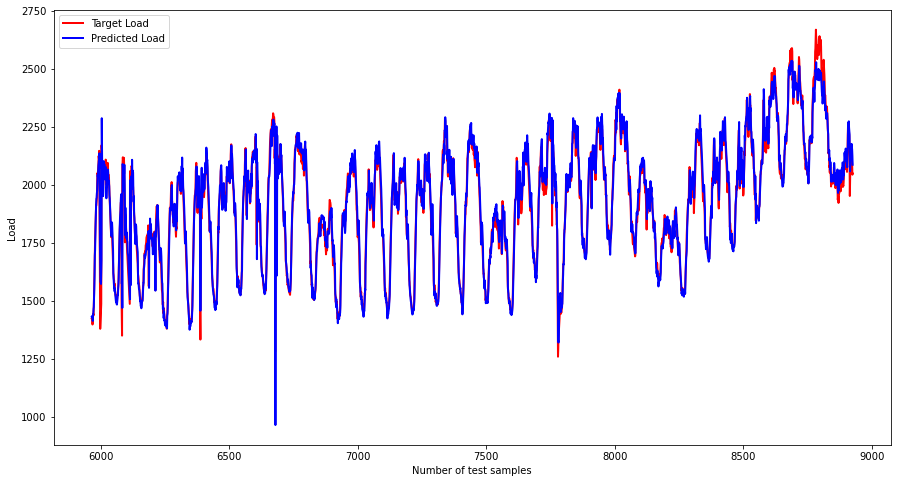

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.7520343354279206


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1   -0.314392
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5964  142169.342763
5965  141969.579322
5966  142269.247830
5967  139672.293837
5968  141771.084799
...             ...
8922  213021.164334
8923  211024.899374
8924  208629.303693
8925  204237.419290
8926  204738.563551

[2963 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5964    56.536274
5965   100.296398
5966    35.238051
5967  1466.307171
5968    30.235924
...           ...
8922  2007.197606
8923  2778.850934
8924  4048.136527
8925  6740.896333
8926  1422.501881

[2963 rows x 1 columns]
y_t+1    3148.16414
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    56.108503
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,2675):
    b=a[i]
    print(b)

[1430.2178]
[1430.7177]
[1429.6328]
[1436.0427]
[1413.2083]
[1439.338]
[1445.2095]
[1464.7864]
[1473.4524]
[1509.406]
[1559.2987]
[1610.6603]
[1695.4664]
[1718.0615]
[1785.706]
[1829.7924]
[1879.2078]
[1916.1029]
[1939.966]
[1943.4728]
[1963.7267]
[1974.0486]
[2013.7579]
[2043.5436]
[2033.2974]
[2061.2566]
[2083.6157]
[2094.715]
[2105.356]
[2068.5427]
[2135.4548]
[1920.3584]
[1735.8774]
[1668.0188]
[1581.6497]
[1582.432]
[1572.5793]
[1628.7056]
[1673.5559]
[2286.6187]
[2145.0674]
[2022.7391]
[1967.2322]
[2006.3422]
[1950.8746]
[1968.866]
[2101.5325]
[2058.3845]
[2049.3625]
[2089.0225]
[2075.6057]
[2040.9792]
[2036.071]
[2022.5013]
[2051.4607]
[2075.7773]
[2071.0886]
[1941.6274]
[1983.5049]
[2000.6082]
[2021.9684]
[2020.4587]
[2038.9271]
[2064.8108]
[2048.9753]
[2004.2651]
[2018.3176]
[2005.6359]
[1993.6576]
[1952.9045]
[1941.703]
[1913.968]
[1892.3566]
[1865.5597]
[1836.087]
[1802.0853]
[1795.1688]
[1777.9689]
[1837.7598]
[1837.2905]
[1814.2113]
[1769.0703]
[1742.8204]
[1717.2145]
[161

[2227.4287]
[2172.7654]
[2166.4465]
[2230.8848]
[2251.0735]
[2208.9463]
[2257.7683]
[2263.924]
[2280.464]
[2270.9656]
[2254.92]
[2257.6584]
[2264.5547]
[2236.6487]
[2089.587]
[2149.1528]
[964.5912]
[1885.8134]
[2102.6074]
[2073.0327]
[2251.194]
[2098.1875]
[1608.9056]
[2212.564]
[2077.5225]
[2112.2944]
[2027.3359]
[2088.2852]
[2107.2322]
[2073.007]
[2046.2847]
[2095.432]
[2052.7742]
[2056.2546]
[2095.11]
[2129.7188]
[2175.5876]
[2167.2224]
[2117.3826]
[2128.5137]
[2092.6572]
[2066.3945]
[2026.5059]
[2006.484]
[1984.867]
[1965.0482]
[1938.831]
[1879.9773]
[1846.1481]
[1821.8372]
[1824.6948]
[1828.32]
[1884.3038]
[1838.7811]
[1815.345]
[1787.8955]
[1746.4064]
[1668.0006]
[1661.2738]
[1643.7402]
[1632.3121]
[1617.6501]
[1617.9749]
[1588.3816]
[1578.1875]
[1591.5659]
[1566.1287]
[1558.4203]
[1553.9663]
[1548.8405]
[1540.0706]
[1551.4216]
[1539.5671]
[1544.619]
[1544.8845]
[1567.1731]
[1593.198]
[1643.7233]
[1709.2407]
[1779.1858]
[1829.0691]
[1873.9869]
[1894.1376]
[1925.9406]
[1942.6765]


[1635.5754]
[1598.8818]
[1588.9884]
[1573.7451]
[1570.9537]
[1557.8671]
[1550.6761]
[1555.1859]
[1530.585]
[1528.8568]
[1512.5787]
[1495.1217]
[1491.4646]
[1482.9459]
[1489.7673]
[1441.5518]
[1467.7708]
[1470.4578]
[1517.3276]
[1576.8962]
[1598.7958]
[1647.2178]
[1699.6232]
[1778.81]
[1803.3103]
[1857.2996]
[1896.9489]
[1912.7214]
[1908.8319]
[1962.8676]
[1946.3495]
[1952.2103]
[1963.9047]
[2008.5245]
[2052.9636]
[2115.5486]
[2126.6785]
[2153.3494]
[2178.3584]
[2190.7737]
[2149.355]
[2193.8838]
[2174.2395]
[2208.9094]
[2229.5396]
[2250.1528]
[2247.9106]
[2261.8762]
[2244.8625]
[2266.3179]
[2177.683]
[2199.0298]
[2216.0576]
[2172.7449]
[2208.768]
[2195.872]
[2174.8462]
[2197.0625]
[2213.3083]
[2183.5627]
[2158.0637]
[2177.6318]
[2161.2917]
[2141.7498]
[2134.9302]
[2112.8918]
[2142.853]
[2158.902]
[2134.267]
[2117.5679]
[2164.9233]
[2138.5269]
[2080.2197]
[2051.6787]
[2137.969]
[2130.7388]
[2096.8333]
[2078.167]
[2093.9927]
[2044.3345]
[2024.3682]
[1994.3934]
[1987.2793]
[1951.9629]
[192

[1851.5474]
[1927.0579]
[1935.772]
[1899.3763]
[1957.2375]
[1982.0911]
[1929.2441]
[1912.7266]
[1917.2865]
[1935.3427]
[1915.083]
[1885.7859]
[1915.9215]
[1925.8728]
[2015.5153]
[2002.9906]
[1970.9282]
[1968.0249]
[1989.2043]
[1948.1954]
[1933.4164]
[1944.2634]
[1893.9254]
[1879.0618]
[1861.521]
[1847.2928]
[1802.3682]
[1798.5709]
[1803.3884]
[1836.1105]
[1838.2712]
[1768.8705]
[1790.9927]
[1762.4958]
[1745.0907]
[1680.0645]
[1643.499]
[1632.4563]
[1616.853]
[1629.9226]
[1604.7375]
[1629.4056]
[1604.9679]
[1600.4702]
[1589.2397]
[1561.7422]
[1580.5997]
[1579.6423]
[1582.5417]
[1594.0778]
[1602.8186]
[1598.1184]
[1589.3611]
[1604.5294]
[1620.064]
[1671.6544]
[1697.2056]
[1732.5762]
[1736.9658]
[1728.2656]
[1731.0781]
[1740.792]
[1725.5586]
[1745.4781]
[1747.7113]
[1756.6334]
[1783.2812]
[1795.9453]
[1797.1033]
[1830.841]
[1852.8143]
[1831.761]
[1788.1769]
[1790.6105]
[1796.3954]
[1799.2571]
[1789.8065]
[1831.4991]
[1826.3235]
[1842.5164]
[1863.0486]
[1813.8075]
[1827.442]
[1837.6489]
[1